# CODESOFT TASK-2

# Customer Churn Prediction

Loading the important Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [63]:
Data=pd.read_csv("Churn_Modelling.csv")

Previewing the dataset

In [64]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

Dimensions of the data

In [65]:
Data.shape

(10000, 14)

Size of the data

In [66]:
Data.size

140000

Columns in given data

In [67]:
Data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Missing value treatment

In [68]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
Data=Data.drop(['RowNumber','CustomerId','Surname','Gender','Geography'],axis=1)

In [71]:
Data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data visualization

In [72]:
Data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [73]:
Data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Barplots

<Axes: >

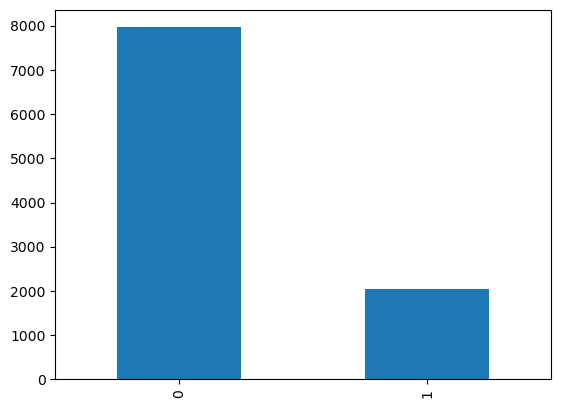

In [74]:
Data['Exited'].value_counts().plot.bar()

<Axes: >

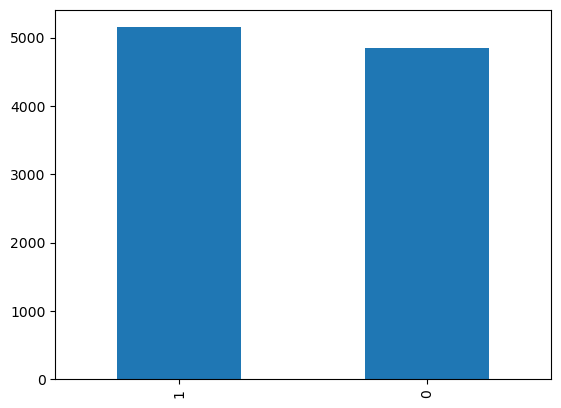

In [75]:
Data['IsActiveMember'].value_counts().plot.bar()

Histogram

<Axes: xlabel='Age', ylabel='Density'>

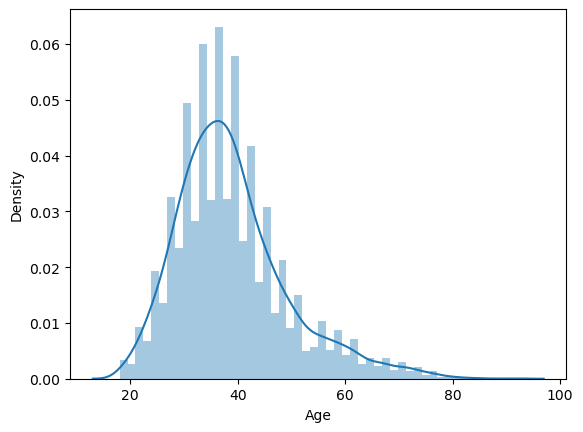

In [76]:
sns.distplot(Data['Age'])

# Correlation Matrix

In [77]:
Data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

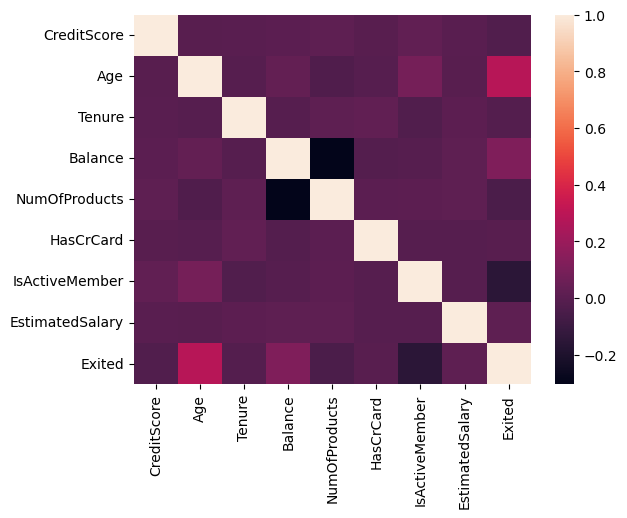

In [78]:
sns.heatmap(Data.corr())

In [79]:
x=Data.drop(['Exited'],axis=1)
y=Data['Exited']

# Splitting the Dataset

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7000, 8), (7000,), (3000, 8), (3000,))

# Logistic Model fitting

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lreg=LogisticRegression()

In [84]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [85]:
lreg.score(x_train,y_train)

0.7934285714285715

In [86]:
y_pred=lreg.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score,accuracy_score,ConfusionMatrixDisplay

In [88]:
recall_score(y_test,y_pred)

0.04574132492113565

In [89]:
precision_score(y_test,y_pred)

0.4027777777777778

In [90]:
accuracy_score(y_test,y_pred)

0.784

In [91]:
f1_score(y_test,y_pred)

0.0821529745042493

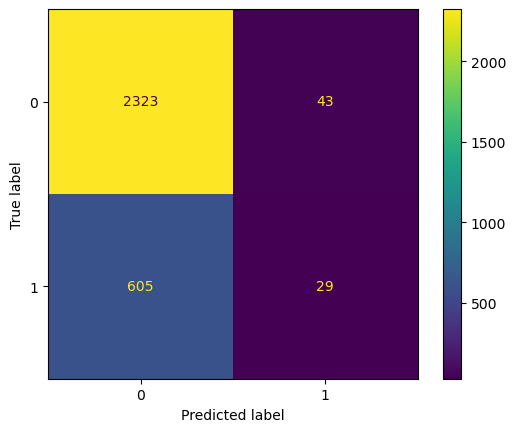

In [92]:
confusionmatrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
confusionmatrix.plot()

# SVM model fitting

In [93]:
from sklearn.svm import SVC

In [94]:
svc=SVC()

In [95]:
svc.fit(x_train,y_train)

SVC()

In [96]:
svc.score(x_train,y_train)

0.7995714285714286

In [97]:
svc.score(x_test,y_test)

0.7886666666666666